<a href="https://colab.research.google.com/github/PetrGavrilin/VKR_URFU/blob/main/VKR_part3_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Линейная регрессия</h1>

In [543]:
# импорт необходимых библиотек
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, ElasticNet, ElasticNetCV, SGDRegressor
from sklearn.model_selection import RandomizedSearchCV # для поиска при случайном сэмплирование гиперпараметров
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error as mse # метрика MSE от Scikit-learn
from sklearn.metrics import r2_score # коэффициент детерминации  от Scikit-learn

In [544]:
try:
  import bottleneck as bn
except:
  !pip install bottleneck
  import bottleneck as bn

In [545]:
# Загрузка файла с функциями, как библиотеки
import sys
sys.path.append('/content')
from vkr_function import print_scores, plot_predict, my_test_train_split

In [546]:
# Загрузка преподготовленных данных
Y = pd.read_csv('/content/flow_rate.csv')
X_tsfel = np.genfromtxt('/content/X_tsfel.csv', delimiter=',')
X_tsfel_savgol = np.genfromtxt('/content/X_tsfel_savgol.csv', delimiter=',')
X_tsfel_rol = np.genfromtxt('/content/X_tsfel_rol.csv', delimiter=',')
borders = pd.read_csv('/content/borders.csv').values.tolist()[0]

Построим модель линейной регрессии на данных, к которым не применялось сглаживание

In [547]:
Y = np.array(Y['Et'])
X = np.array(X_tsfel)[1:]

In [548]:
X_train, y_train, X_test, y_test, i_test = my_test_train_split(X, Y, borders)

In [549]:
#LM = ElasticNetCV(max_iter = 10000)
#LM = Ridge()
LM = LinearRegression()
#LM = RidgeCV()
#LM = SGDRegressor()

In [550]:
Modellica = [
    LinearRegression(),
    Lasso(), Ridge(),
    ElasticNetCV(max_iter = 10000),
    RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1, 10]),
    SGDRegressor()]

scores = pd.DataFrame(index=['mse', 'rmse', 'r2'])

for model in Modellica:
  model.fit(X_train, y_train)
  y_predict = model.predict(X_test)
  scores.insert(
      len(scores.columns),
      model,
      [mse(y_test,y_predict),mse(y_test,y_predict,squared=False),r2_score(y_test,y_predict)]
      )

scores

,LinearRegression(),Lasso(),Ridge(),ElasticNetCV(max_iter=10000),"RidgeCV(alphas=[0.001, 0.01, 0.1, 1, 10])",SGDRegressor()
mse,0.001084,0.517857,0.001074,0.001104,0.001058,0.020573
rmse,0.032925,0.719623,0.032772,0.033219,0.032527,0.143432
r2,0.997907,-0.000027,0.997926,0.997869,0.997957,0.960272


In [551]:
# Обучение модели и вывод метрик
LM.fit(X_train, y_train)
y_predict = LM.predict(X_test)
print_scores(y_test, y_predict, True)


Ошибка на тестовых данных
MSE: 0.00108
RMSE: 0.03292
R2 : 0.99791


In [552]:
y_predict_tr = LM.predict(X_train)
print_scores(y_train, y_predict_tr, False)

Ошибка на тренировочных данных
MSE: 0.00082
RMSE: 0.02871
R2 : 0.99841


In [553]:
y_predict_all = LM.predict(X)
print_scores(Y, y_predict_all)

Ошибка на полных данных
MSE: 0.00085
RMSE: 0.02916
R2 : 0.99836


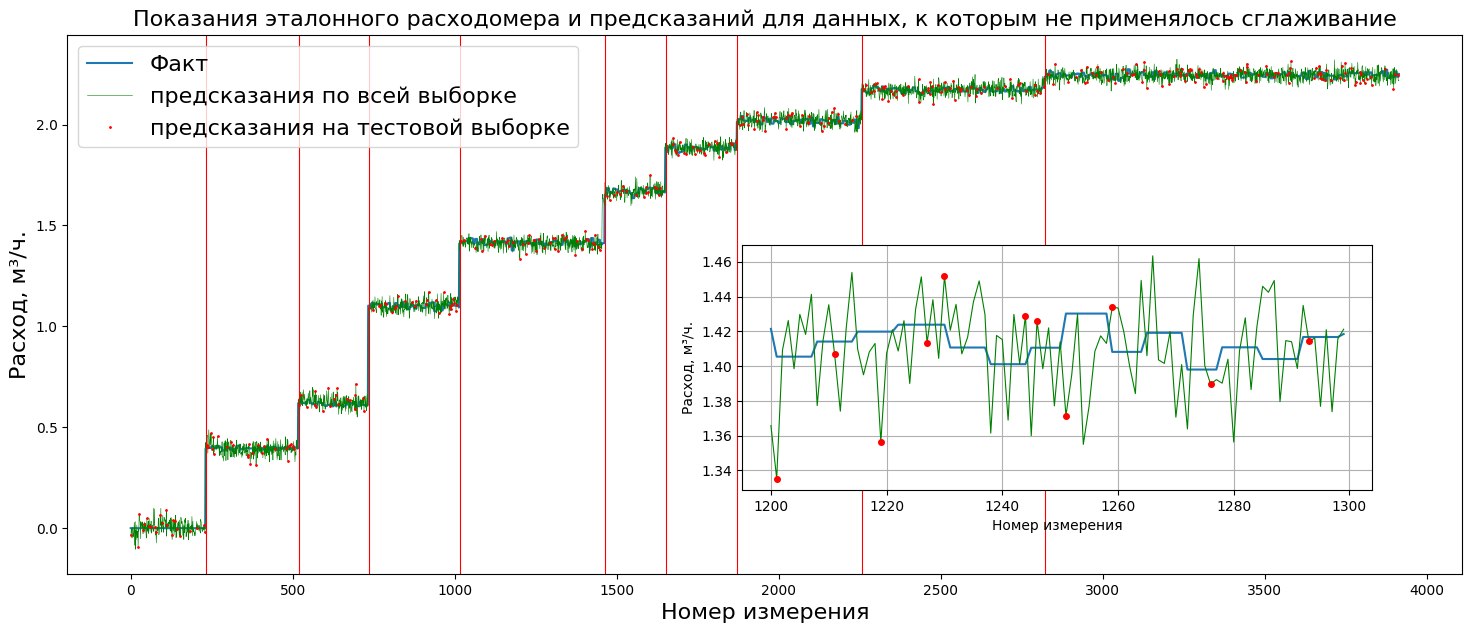

In [554]:
plot_predict(Y, i_test, y_predict, y_predict_all, borders, text="данных, к которым не применялось сглаживание")

In [555]:
y_rolling_all = bn.move_mean(y_predict_all, window=3, min_count=1)
y_rolling_test = bn.move_mean(y_predict, window=3, min_count=1)

In [556]:
y_rolling_all

array([-0.03327698, -0.02996583, -0.02083106, ...,  2.23948977,
        2.22867383,  2.21885813])

In [557]:
print_scores(Y, y_rolling_all)

Ошибка на полных данных
MSE: 0.00049
RMSE: 0.02224
R2 : 0.99904


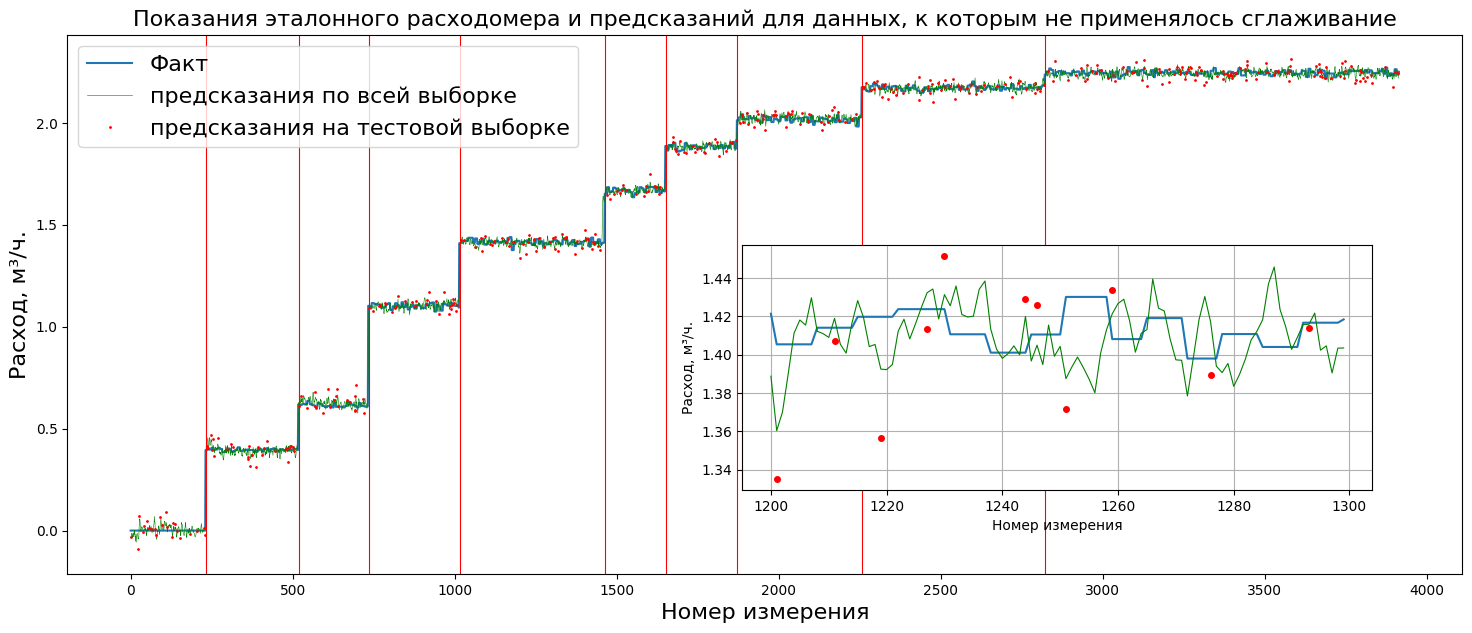

In [558]:
plot_predict(Y, i_test, y_predict, y_rolling_all, borders, text="данных, к которым не применялось сглаживание")

In [559]:
l_ = len(Y)

i_test = list(range(borders[3],borders[4]))

i_train = list(range(0,l_))
for x1 in i_test:
  i_train.remove(x1)

X_train = X[i_train,:]
y_train = Y[i_train]

X_test = X[i_test,:]
y_test = Y[i_test]

print(len(X_train), len(y_train))

3466 3466


In [560]:
scores = pd.DataFrame(index=['mse', 'rmse', 'r2'])

for model in Modellica:
  model.fit(X_train, y_train)
  y_predict = model.predict(X_test)
  scores.insert(
      len(scores.columns),
      model,
      [mse(y_test,y_predict),mse(y_test,y_predict,squared=False),r2_score(y_test,y_predict)]
      )

scores

,LinearRegression(),Lasso(),Ridge(),ElasticNetCV(max_iter=10000),"RidgeCV(alphas=[0.001, 0.01, 0.1, 1, 10])",SGDRegressor()
mse,0.002304,0.058269,0.002300,0.002336,0.002302,0.013067
rmse,0.048003,0.241389,0.047956,0.048333,0.047980,0.114310
r2,-7.878294,-223.502675,-7.860737,-8.000489,-7.869789,-49.344975


In [561]:
# Обучение модели и вывод метрик
LM.fit(X_train, y_train)
y_predict = LM.predict(X_test)
print_scores(y_test, y_predict, True)

Ошибка на тестовых данных
MSE: 0.00230
RMSE: 0.04800
R2 : -7.87829


In [562]:
y_predict_tr = LM.predict(X_train)
print_scores(y_train, y_predict_tr, False)

Ошибка на тренировочных данных
MSE: 0.00071
RMSE: 0.02667
R2 : 0.99877


In [563]:
y_predict_all = LM.predict(X)
print_scores(Y, y_predict_all)

Ошибка на полных данных
MSE: 0.00089
RMSE: 0.02990
R2 : 0.99827


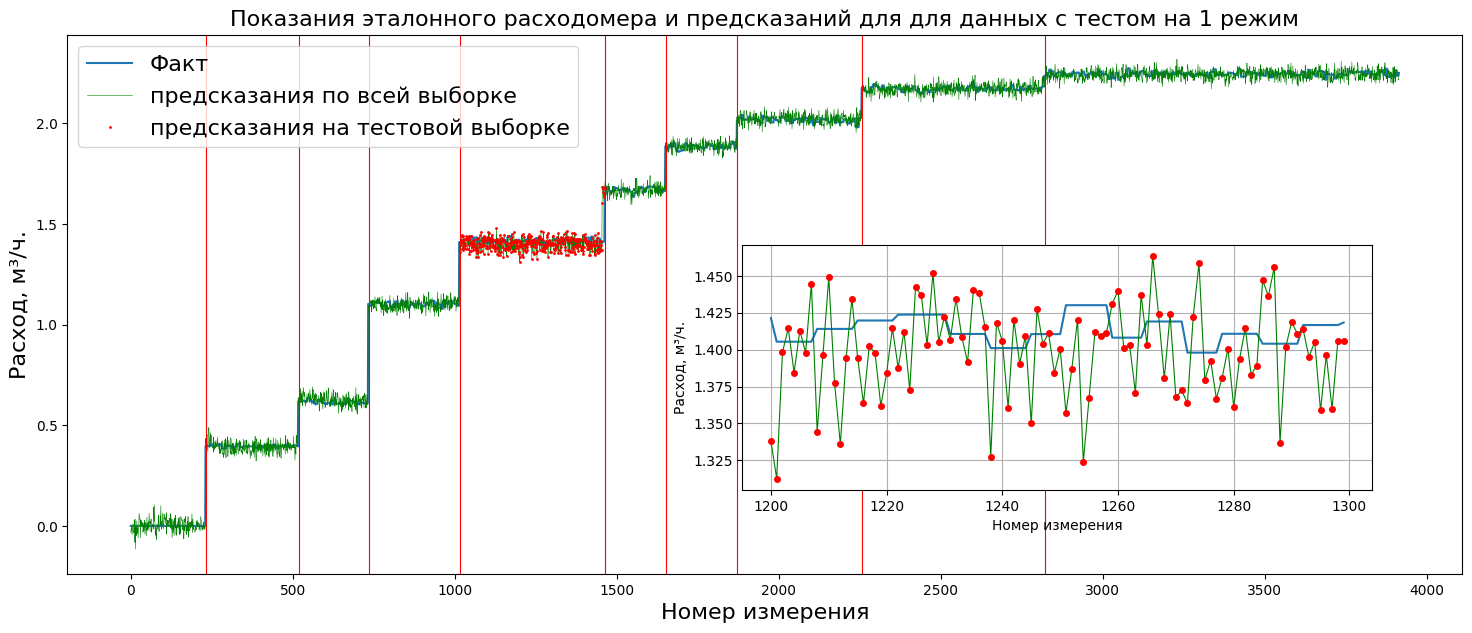

In [564]:
plot_predict(Y, i_test, y_predict, y_predict_all, borders, text="для данных с тестом на 1 режим")

In [565]:
Y[1015:1464].sum()/(1464-1015)

1.4169322693003341

In [566]:
y_predict_all[1015:1464].sum()/(1464-1015)

1.4053066970897967

In [567]:
y_rolling_all = bn.move_mean(y_predict_all, window=12, min_count=1)
y_rolling_train = bn.move_mean(y_predict_tr, window=12, min_count=1)
y_rolling_test = bn.move_mean(y_predict, window=12, min_count=1)

In [568]:
print_scores(y_test, y_rolling_test, True)
print()
print_scores(y_train, y_rolling_train, True)
print()
print_scores(Y, y_rolling_all, True)

Ошибка на тестовых данных
MSE: 0.00062
RMSE: 0.02493
R2 : -1.39516

Ошибка на тестовых данных
MSE: 0.00095
RMSE: 0.03076
R2 : 0.99836

Ошибка на тестовых данных
MSE: 0.00075
RMSE: 0.02745
R2 : 0.99854


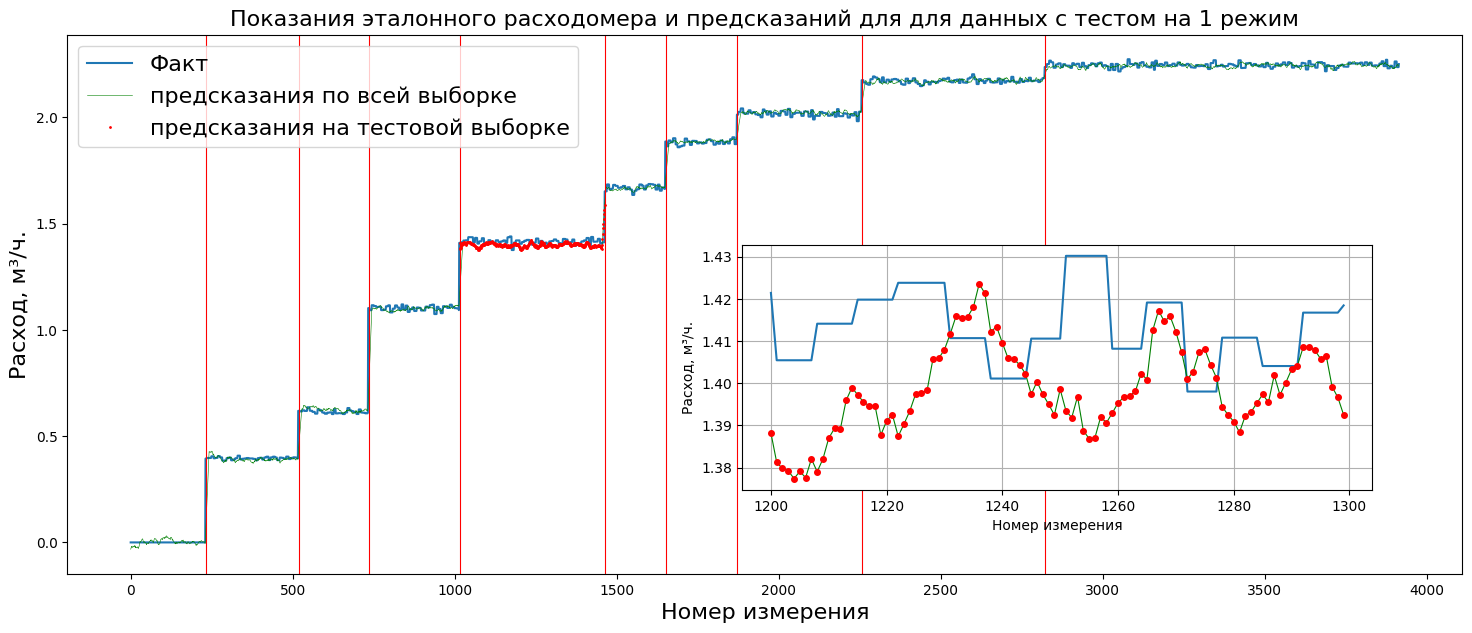

In [569]:
plot_predict(Y, i_test, y_rolling_test, y_rolling_all, borders, text="для данных с тестом на 1 режим")

Из колебаний графика предсказаний вокруг фактических данных, а также учитывая построенный ранее график из исходных данных по разности времён, можно предположить, что для исключения колебаний показания расхода необходимо применить сглаживание к исходным данным.

Обучение модели на дополнительно обработанных данных с помощью функции Савицкого-Голея

In [570]:
X = np.array(X_tsfel_savgol)[1:]


In [571]:
X_train, y_train, X_test, y_test, i_test = my_test_train_split(X, Y, borders)

In [572]:
scores = pd.DataFrame(index=['mse', 'rmse', 'r2'])

for model in Modellica:
  model.fit(X_train, y_train)
  y_predict = model.predict(X_test)
  scores.insert(
      len(scores.columns),
      model,
      [mse(y_test,y_predict),mse(y_test,y_predict,squared=False),r2_score(y_test,y_predict)]
      )

scores

,LinearRegression(),Lasso(),Ridge(),ElasticNetCV(max_iter=10000),"RidgeCV(alphas=[0.001, 0.01, 0.1, 1, 10])",SGDRegressor()
mse,0.000244,0.518043,0.000249,0.000522,0.000249,1.166948e+15
rmse,0.015633,0.719752,0.015774,0.022837,0.015774,3.416061e+07
r2,0.999528,-0.000015,0.999520,0.998993,0.999520,-2.252639e+15


In [573]:
# Обучение модели и вывод метрик
LM.fit(X_train, y_train)
y_predict = LM.predict(X_test)
print_scores(y_test, y_predict, True)

Ошибка на тестовых данных
MSE: 0.00024
RMSE: 0.01563
R2 : 0.99953


In [574]:
y_predict_tr = LM.predict(X_train)
print_scores(y_train, y_predict_tr, False)

Ошибка на тренировочных данных
MSE: 0.00027
RMSE: 0.01656
R2 : 0.99947


In [575]:
y_predict_all = LM.predict(X)
print_scores(Y, y_predict_all)

Ошибка на полных данных
MSE: 0.00027
RMSE: 0.01647
R2 : 0.99948


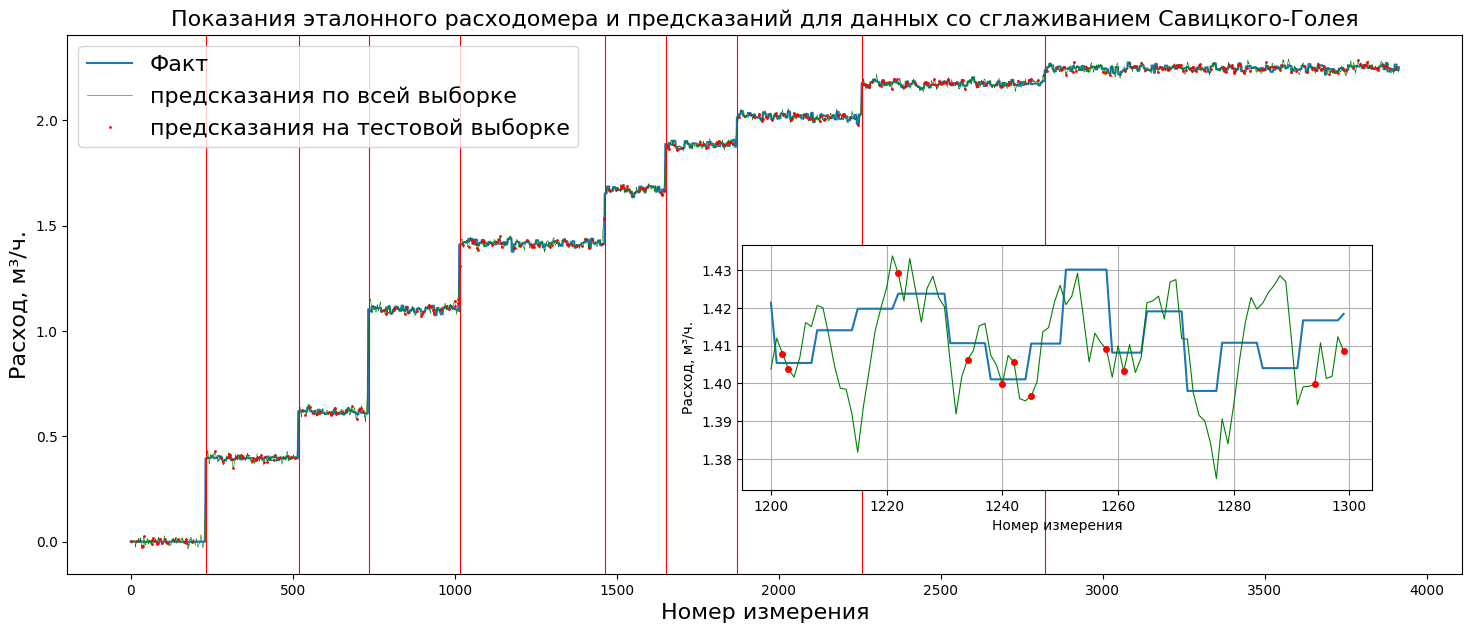

In [576]:
plot_predict(Y, i_test, y_predict, y_predict_all, borders, text="данных со сглаживанием Савицкого-Голея")

Проверим работу модели, приняв за тестовую выборку один из режимов расхода

In [577]:
l_ = len(Y)

i_test = list(range(borders[3],borders[4]))

i_train = list(range(0,l_))
for x1 in i_test:
  i_train.remove(x1)

X_train = X[i_train,:]
y_train = Y[i_train]

X_test = X[i_test,:]
y_test = Y[i_test]

print(len(X_train), len(y_train))

3466 3466


In [578]:
scores = pd.DataFrame(index=['mse', 'rmse', 'r2'])

for model in Modellica:
  model.fit(X_train, y_train)
  y_predict = model.predict(X_test)
  scores.insert(
      len(scores.columns),
      model,
      [mse(y_test,y_predict),mse(y_test,y_predict,squared=False),r2_score(y_test,y_predict)]
      )

scores

,LinearRegression(),Lasso(),Ridge(),ElasticNetCV(max_iter=10000),"RidgeCV(alphas=[0.001, 0.01, 0.1, 1, 10])",SGDRegressor()
mse,0.002090,0.058269,0.001896,0.001558,0.002052,2.663037e+16
rmse,0.045715,0.241389,0.043542,0.039473,0.045303,1.631881e+08
r2,-7.052043,-223.502675,-6.304805,-5.003139,-6.907491,-1.026036e+20


In [579]:
# Обучение модели и вывод метрик
LM.fit(X_train, y_train)
y_predict = LM.predict(X_test)
print_scores(y_test, y_predict, True)

Ошибка на тестовых данных
MSE: 0.00209
RMSE: 0.04572
R2 : -7.05204


In [580]:
y_predict_tr = LM.predict(X_train)
print_scores(y_train, y_predict_tr, False)

Ошибка на тренировочных данных
MSE: 0.00021
RMSE: 0.01462
R2 : 0.99963


In [581]:
y_predict_all = LM.predict(X)
print_scores(Y, y_predict_all)

Ошибка на полных данных
MSE: 0.00043
RMSE: 0.02071
R2 : 0.99917


In [582]:
LM.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

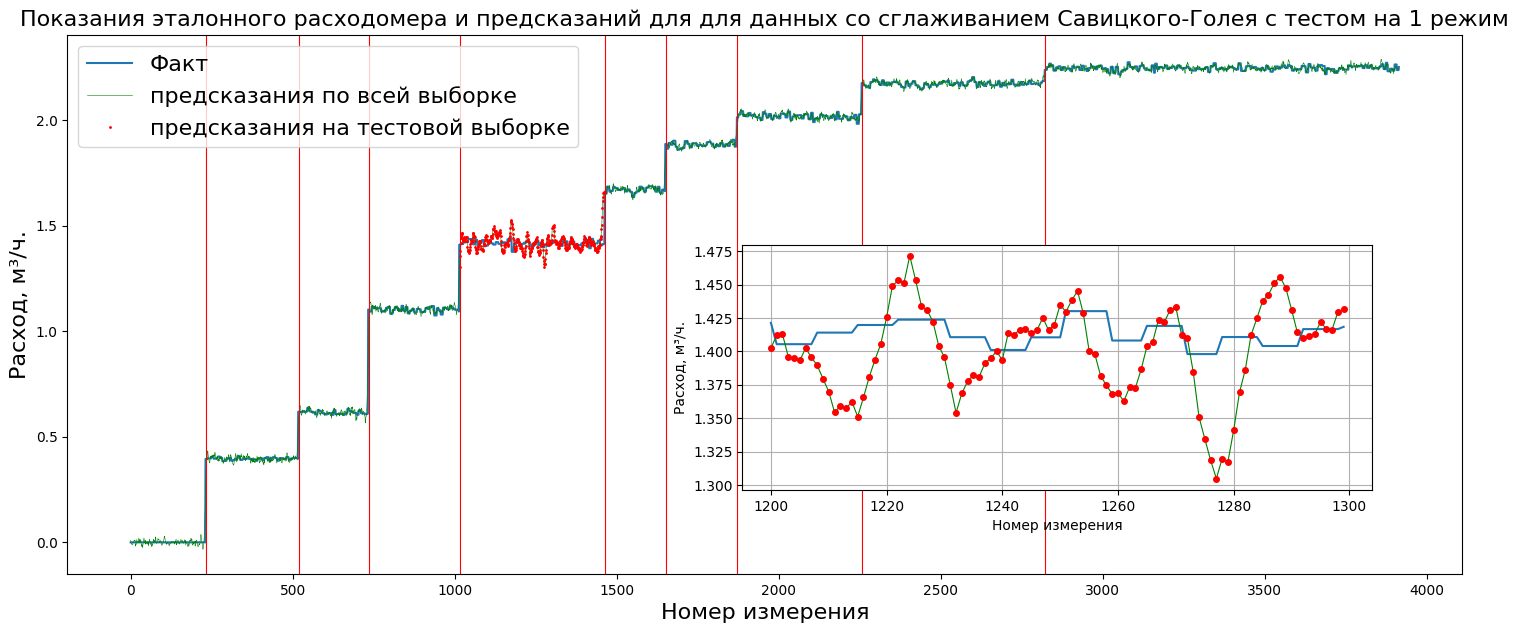

In [583]:
plot_predict(Y, i_test, y_predict, y_predict_all, borders, text="для данных со сглаживанием Савицкого-Голея с тестом на 1 режим")

In [584]:
Y[1015:1464].sum()/(1464-1015)

1.4169322693003341

In [585]:
y_predict_all[1015:1464].sum()/(1464-1015)

1.4225035503688015

Построим линейную модель для данных со скользящим средним

In [586]:
X = np.array(X_tsfel_rol)[1:]

In [587]:
X_train, y_train, X_test, y_test, i_test = my_test_train_split(X, Y, borders)

In [588]:
scores = pd.DataFrame(index=['mse', 'rmse', 'r2'])

for model in Modellica:
  model.fit(X_train, y_train)
  y_predict = model.predict(X_test)
  scores.insert(
      len(scores.columns),
      model,
      [mse(y_test,y_predict),mse(y_test,y_predict,squared=False),r2_score(y_test,y_predict)]
      )

scores

,LinearRegression(),Lasso(),Ridge(),ElasticNetCV(max_iter=10000),"RidgeCV(alphas=[0.001, 0.01, 0.1, 1, 10])",SGDRegressor()
mse,0.000388,0.517155,0.000382,0.000769,0.000386,2.547855e+21
rmse,0.019687,0.719135,0.019548,0.027724,0.019648,5.047628e+10
r2,0.999251,-0.000010,0.999261,0.998514,0.999253,-4.926723e+21


In [589]:
# Обучение модели и вывод метрик
LM.fit(X_train, y_train)
y_predict = LM.predict(X_test)
print_scores(y_test, y_predict, True)

Ошибка на тестовых данных
MSE: 0.00039
RMSE: 0.01969
R2 : 0.99925


In [590]:
y_predict_tr = LM.predict(X_train)
print_scores(y_train, y_predict_tr, False)

Ошибка на тренировочных данных
MSE: 0.00041
RMSE: 0.02023
R2 : 0.99921


In [591]:
y_predict_all = LM.predict(X)
print_scores(Y, y_predict_all)

Ошибка на полных данных
MSE: 0.00041
RMSE: 0.02017
R2 : 0.99921


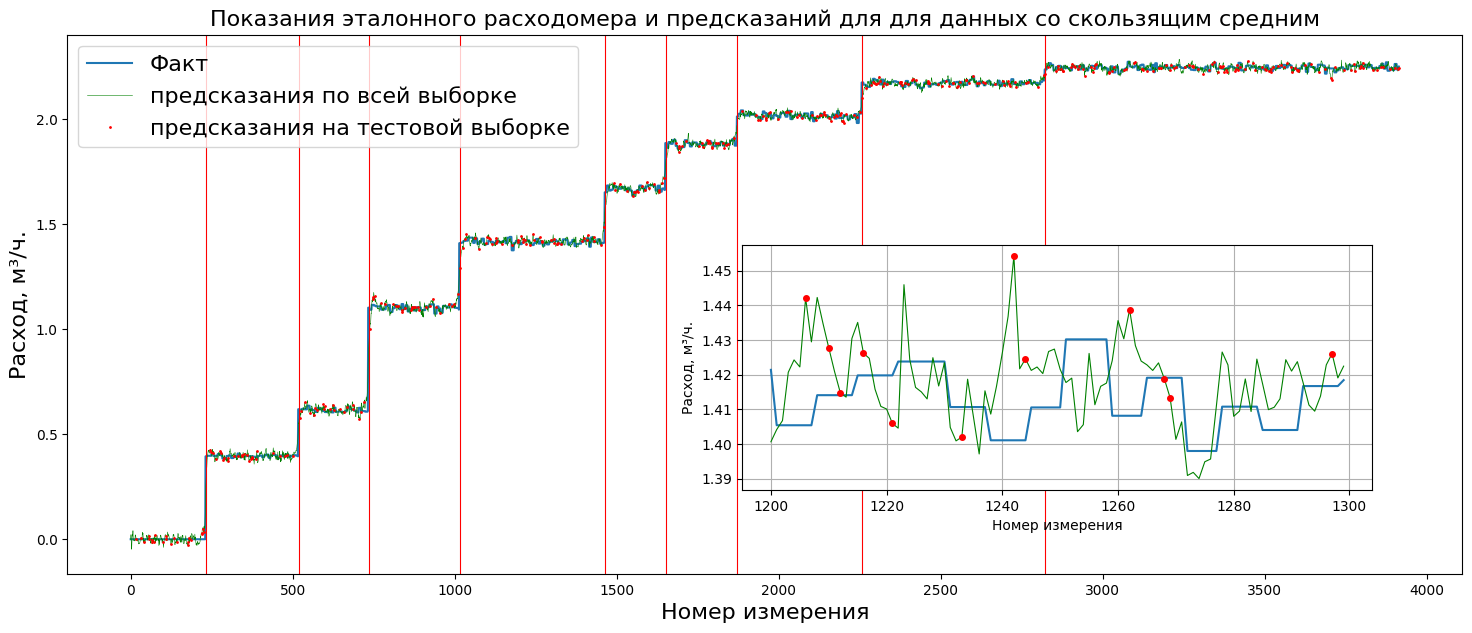

In [592]:
plot_predict(Y, i_test, y_predict, y_predict_all, borders, text="для данных со скользящим средним")